In [5]:
import matplotlib.pyplot as plt

from bandits import average_finder
from strategies import *

In [6]:
machine_no = 100
trial_no = 20000
gaussian = True
number_of_iterations = 50
numbers_to_try = [True, False]

In [7]:
def strategy_average(plot_object, number_of_its: int, number_machine: int,
                     number_trial: int, gaussian_bool):
    regret_list = []
    for iteration in range(number_of_its):
        env = thompson_sampling_strategy(number_machine, number_trial,
                                         gaussian=numbers_to_try[
                                             gaussian_bool])
        if len(env.regret) != number_trial:
            env.update()
        regret_list.append(env.regret)
    averages, ci_minuss, ci_pluss = average_finder(regret_list, number_trial,
                                                   number_of_its)
    if gaussian_bool:
        plot_object.plot(range(len(averages)), averages, alpha=0.5, lw=2,
                         label="Gaussian")
        plot_object.fill_between(range(len(averages)), ci_minuss,
                                 ci_pluss, alpha=.1)
    else:
        plot_object.plot(range(len(averages)), averages, alpha=0.5, lw=2,
                         label="Bernoulli")
        plot_object.fill_between(range(len(averages)), ci_minuss,
                                 ci_pluss, alpha=.1)
    return

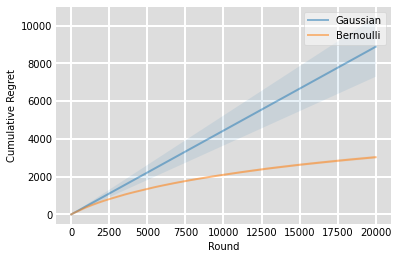

In [8]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
for epsilon in numbers_to_try:
    strategy_average(plot_object=ax, number_of_its=number_of_iterations,
                     number_machine=machine_no, number_trial=trial_no,
                     gaussian_bool=epsilon)
ax.set_xlabel('Round')
ax.set_ylabel('Cumulative Regret')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='both', c='w', lw=2, ls='-')
# plt.title("")
legend = ax.legend(title="")
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('thompson_plot.png', dpi=1000, transparent=False,
            bbox_inches='tight')
plt.show()
